<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Описание данных

**Технологический процесс**
 - Rougher feed — исходное сырье
 - Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
 - Xanthate — ксантогенат (промотер, или активатор флотации);
 - Sulphate — сульфат (на данном производстве сульфид натрия);
 - Depressant — депрессант (силикат натрия).
 - Rougher process (англ. «грубый процесс») — флотация
 - Rougher tails — отвальные хвосты
 - Float banks — флотационная установка
 - Cleaner process — очистка
 - Rougher Au — черновой концентрат золота
 - Final Au — финальный концентрат золота
 
**Параметры этапов**

 - air amount — объём воздуха
 - fluid levels — уровень жидкости
 - feed size — размер гранул сырья
 - feed rate — скорость подачи

## Подготовка данных

Импортируем необходимые библиотеки

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

**Данные находятся в трёх файлах:**

- gold_recovery_train_new.csv — обучающая выборка;
- gold_recovery_test_new.csv — тестовая выборка;
- gold_recovery_full_new.csv — исходные данные.

Загрузим даные датафреймы и добавим полное отображение столбцов и строчек

In [2]:
try:   
    gold_recovery_train_new = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    gold_recovery_test_new = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    gold_recovery_full_new = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    gold_recovery_train_new = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
    gold_recovery_test_new = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
    gold_recovery_full_new = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Выведем первые 5 строк обучающей выборки и посмотрим общую информацию 

In [3]:
gold_recovery_train_new.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [4]:
gold_recovery_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Выведем первые 5 строк тестовой выборки и посмотрим общую информацию 

In [5]:
gold_recovery_test_new.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [6]:
gold_recovery_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Выведем первые 5 строк исходных данных и посмотрим общую информацию 

In [7]:
gold_recovery_full_new.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [8]:
gold_recovery_full_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Проверим правильность расчета эффективности обогащения

In [9]:
c = gold_recovery_train_new['rougher.output.concentrate_au']
f = gold_recovery_train_new['rougher.input.feed_au']
t = gold_recovery_train_new['rougher.output.tail_au']

recovery = (c * (f - t)) / (f * (c - t)) * 100
MAE_recovery = (abs(recovery - gold_recovery_train_new['rougher.output.recovery'])).sum() / len(recovery)
MAE_recovery

9.73512347450521e-15

Проверка показало что абсолютное отклонение нашей величины от рассчитанной составляет 9.73512347450521e-15, что является очень маленьким отклонением. Данные, которые были рассчитаны в датафрейме, можно считать верными 

Приступив к предобработке данных. Можно заметить что в тестовой выборке отсутствуют некоторые колонки, которые есть в обучающей выборке. Найдем такие колонки

In [10]:
gold_recovery_train_new_columns = list(gold_recovery_train_new.columns)
gold_recovery_test_new_columns = list(gold_recovery_test_new.columns)
not_in_test_list = []

for i in gold_recovery_train_new_columns:
    if i not in gold_recovery_test_new_columns:
        not_in_test_list.append(i)
not_in_test_list

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Заметим, что в обучающей выборке отсутствуют выходные значения. Разница в том, что в train собраны исторические данные о состоянии техпроцесса, в том числе промежуточные и финальные его показатели. В test же есть только те признаки, которые доступны на старте техпроцесса - именно с ними может работать модель, потому что на старте техпроцесса других признаков мы не можем знать заранее.

Поскольку исходные данные уже разбиты на обучающую и тестовую выборку, то работать будем только с ними. Найдем все пропуски в обучающей и тестовой выборке 

In [11]:
gold_recovery_train_new.isna().sum()

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

In [12]:
gold_recovery_test_new.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

Удалим из обучающей выбоки столбцы, которые отсутствуют в тестовой выбоки. Оставим только таргетные признаки 

In [13]:
del not_in_test_list[not_in_test_list.index('rougher.output.recovery')]
del not_in_test_list[not_in_test_list.index('final.output.recovery')]

gold_recovery_train_new_remove = gold_recovery_train_new.drop(not_in_test_list, axis=1)

Добавим в тестовую выборку таргетные значения

In [14]:
pd.options.mode.chained_assignment = None
gold_recovery_full_new_target = gold_recovery_full_new[['date', 'rougher.output.recovery', 'final.output.recovery']]
gold_recovery_full_new_target['date'] = pd.to_datetime(gold_recovery_full_new_target['date'], format='%Y-%m-%d %H:%M:%S')
gold_recovery_test_new['date'] = pd.to_datetime(gold_recovery_test_new['date'], format='%Y-%m-%d %H:%M:%S')
gold_recovery_test_new = gold_recovery_test_new.merge(gold_recovery_full_new_target, on='date', how='left')
gold_recovery_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5286 non-null   float64       
 2   primary_cleaner.input.depressant            5285 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5286 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

Удалим все строчки с пропусками в обучающей и тестовой выборке чтобы не добавлять искусственные данные в датафрейм     

In [15]:
first_shape_train = gold_recovery_train_new_remove.shape[0]
gold_recovery_train_new_remove.isna().sum()
gold_recovery_train_new_remove = gold_recovery_train_new_remove.dropna()
second_shape_train = gold_recovery_train_new_remove.shape[0]
procent_remove_row = (1 - second_shape_train / first_shape_train) * 100
procent_remove_row

10.389426814615877

In [16]:
first_shape_test = gold_recovery_test_new.shape[0]
gold_recovery_test_new_remove = gold_recovery_test_new.dropna()
second_shape_test = gold_recovery_test_new_remove.shape[0]
procent_remove_row_test = (1 - second_shape_test / first_shape_test) * 100
procent_remove_row_test

1.153119092627597

Общая сумма удаленных строчек составило 11%, что весомо, но не сильно критично.    

Проверим данные на дубликаты

In [17]:
gold_recovery_train_new_remove.duplicated().sum(), gold_recovery_test_new_remove.duplicated().sum(), 

(0, 0)

Дубликаты не обнаружены       

**В данном разделе были подгружены необходимые датафреймы для обучения модели. Посчитали правильность расчета эффективности обогащения и определили, что в тестовой выборке отсутствуют выходные величины. Добавили таргетные признаки в тестовую выборку. Удалены все пропуски и произведена проверка на дубликаты.**

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Построим гистограммы для концентрации Au на разных этапах

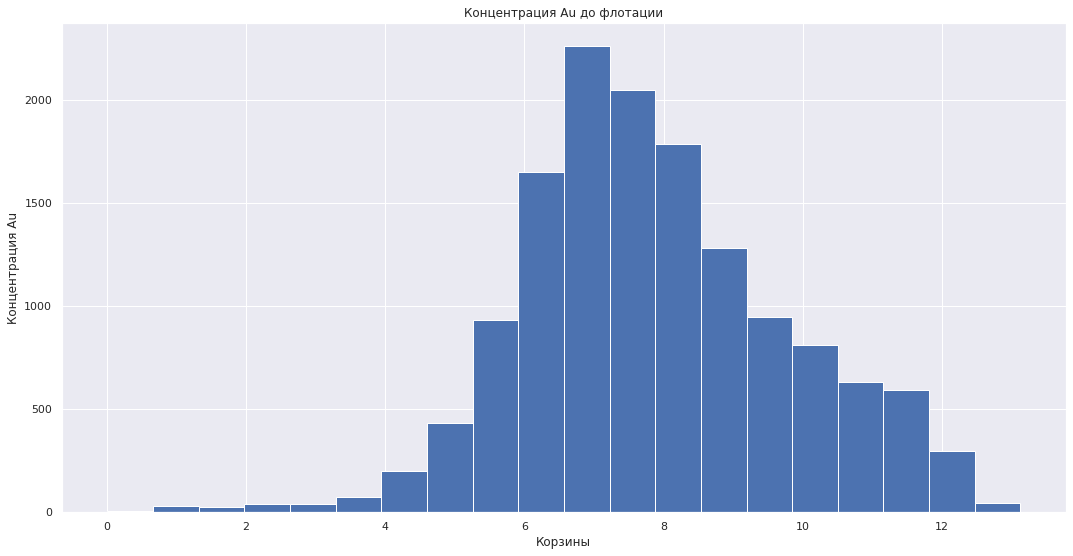

In [18]:
sns.set(rc={'figure.figsize':(18,9)})
gold_recovery_train_new['rougher.input.feed_au'].hist(bins=20)
plt.title('Концентрация Au до флотации');
plt.xlabel('Корзины')
plt.ylabel('Концентрация Au');

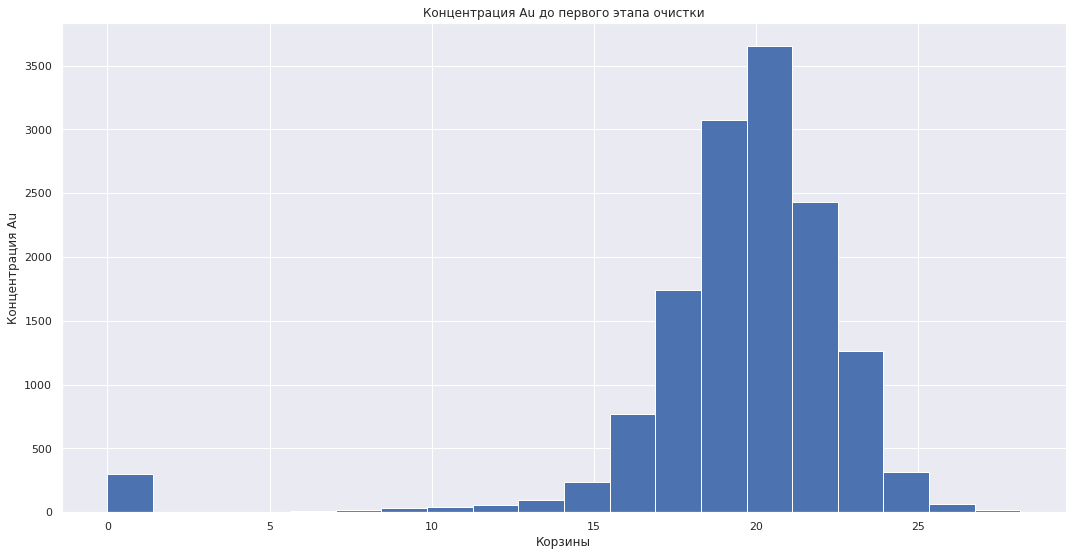

In [19]:
gold_recovery_train_new['rougher.output.concentrate_au'].hist(bins=20)
plt.title('Концентрация Au до первого этапа очистки');
plt.xlabel('Корзины')
plt.ylabel('Концентрация Au');

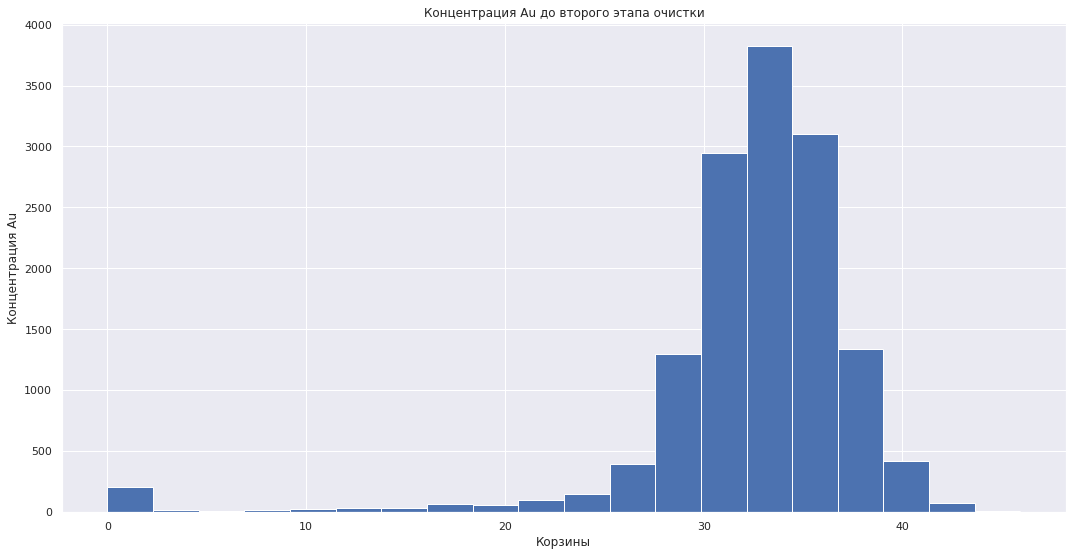

In [20]:
gold_recovery_train_new['primary_cleaner.output.concentrate_au'].hist(bins=20)
plt.title('Концентрация Au до второго этапа очистки');
plt.xlabel('Корзины')
plt.ylabel('Концентрация Au');

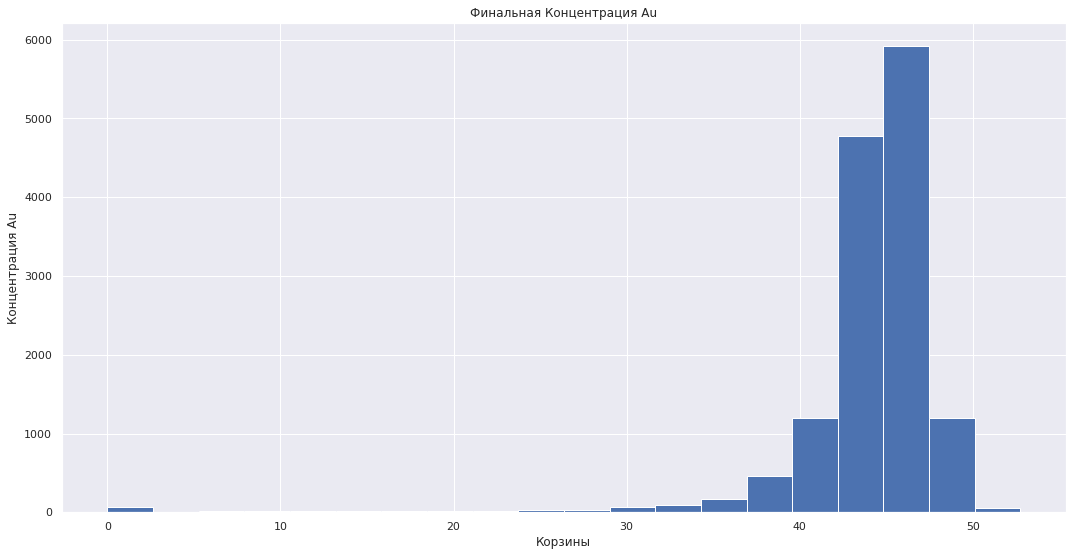

In [21]:
gold_recovery_train_new['final.output.concentrate_au'].hist(bins=20)
plt.title('Финальная Концентрация Au');
plt.xlabel('Корзины')
plt.ylabel('Концентрация Au');

**Из графиков видно, что наибольшая общая концентрация метала Au на финальной стадии, и концентрация увеличивается с каждым этапом очистки**

Построим график для концентрации Ag

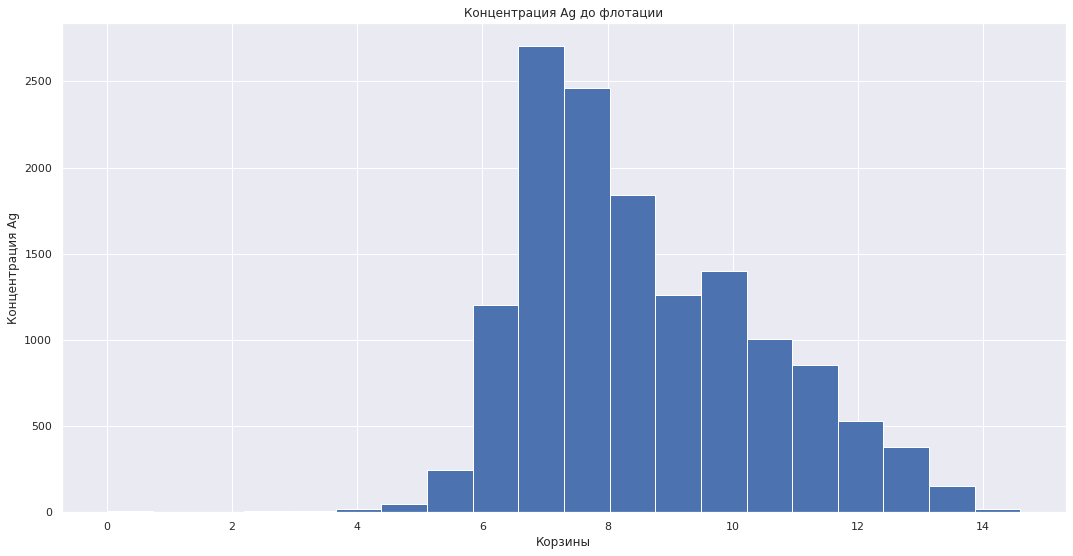

In [22]:
gold_recovery_train_new['rougher.input.feed_ag'].hist(bins=20)
plt.title('Концентрация Ag до флотации');
plt.xlabel('Корзины')
plt.ylabel('Концентрация Ag');

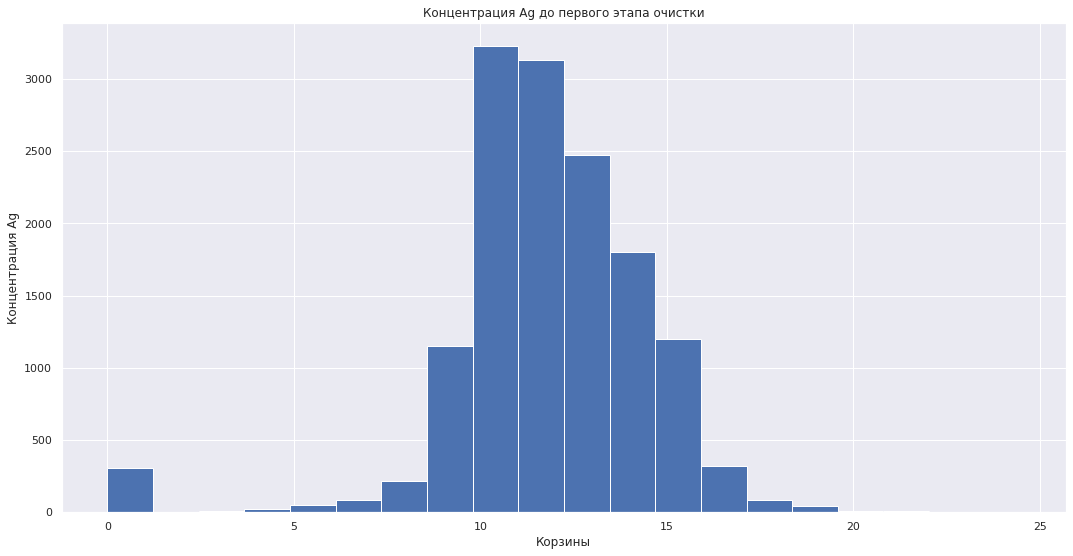

In [23]:
gold_recovery_train_new['rougher.output.concentrate_ag'].hist(bins=20)
plt.title('Концентрация Ag до первого этапа очистки');
plt.xlabel('Корзины')
plt.ylabel('Концентрация Ag');

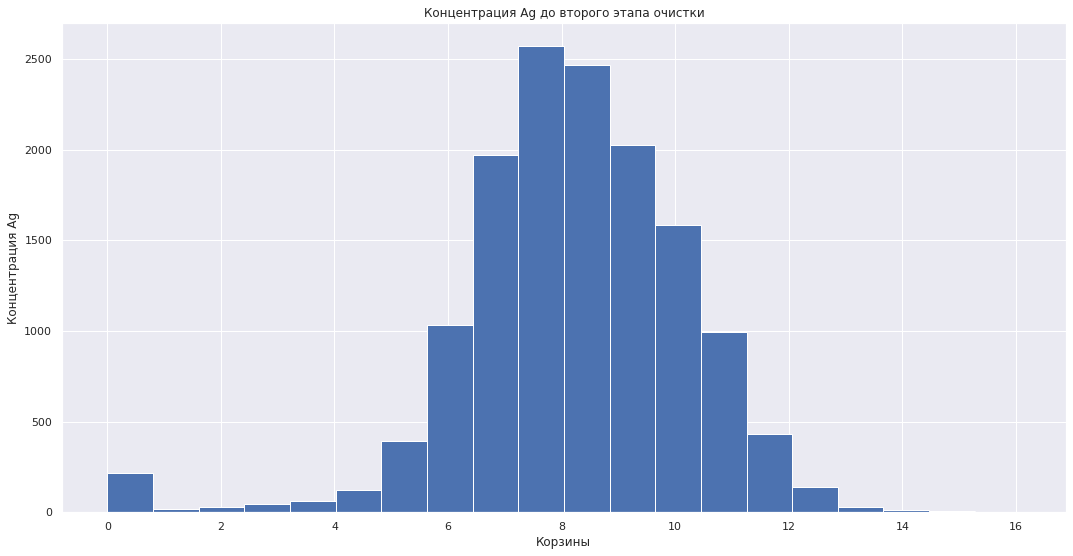

In [24]:
gold_recovery_train_new['primary_cleaner.output.concentrate_ag'].hist(bins=20)
plt.title('Концентрация Ag до второго этапа очистки');
plt.xlabel('Корзины')
plt.ylabel('Концентрация Ag');

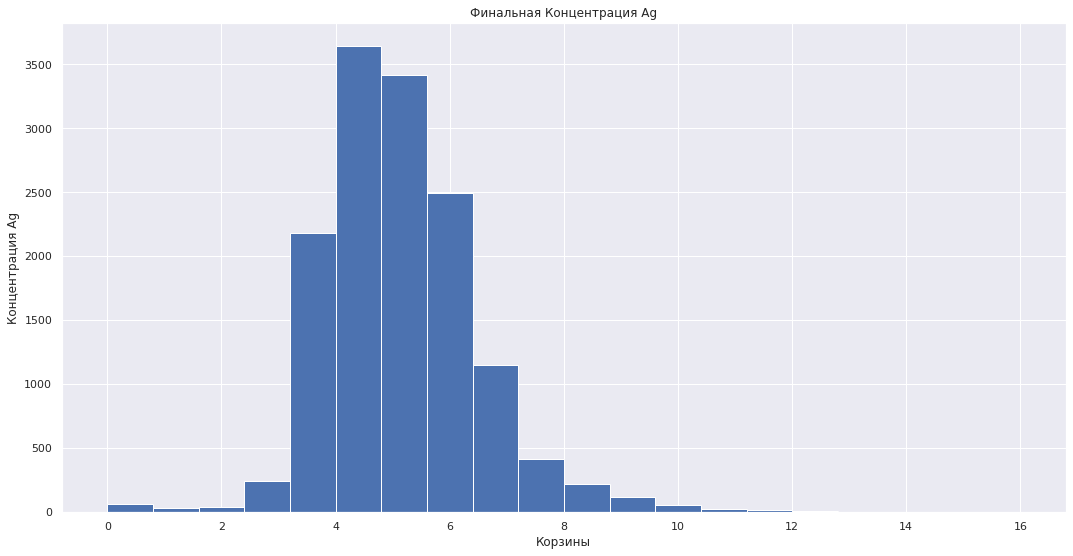

In [25]:
gold_recovery_train_new['final.output.concentrate_ag'].hist(bins=20)
plt.title('Финальная Концентрация Ag');
plt.xlabel('Корзины')
plt.ylabel('Концентрация Ag');

**Из графиков видно, что наибольшая общая концентрация метала Ag на стадии перед первым этапом очистки и концентрация уменьшается с каждым этапом очистки после флотации**

Построим график для концентрации Pb

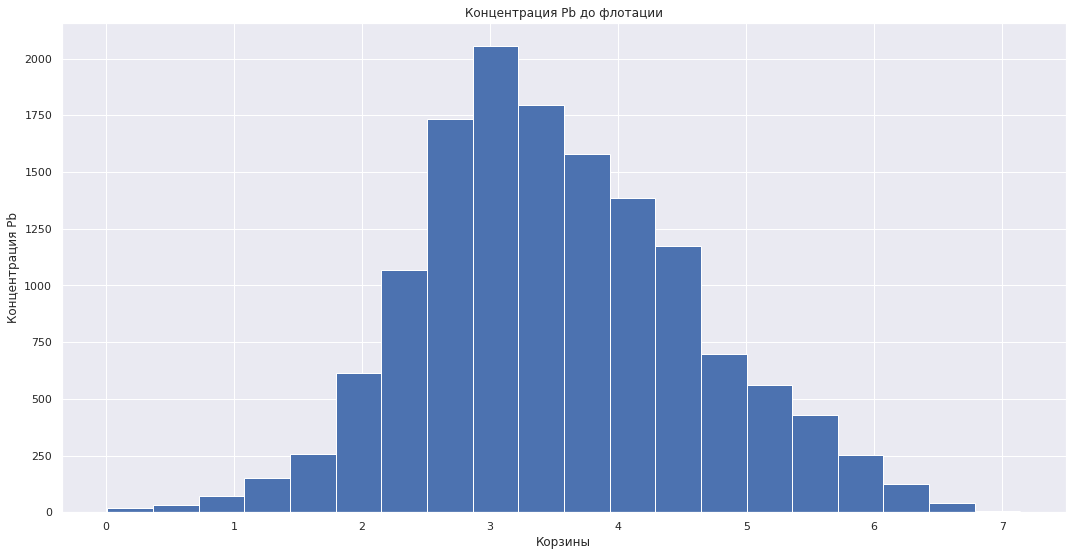

In [26]:
gold_recovery_train_new['rougher.input.feed_pb'].hist(bins=20)
plt.title('Концентрация Pb до флотации');
plt.xlabel('Корзины')
plt.ylabel('Концентрация Pb');

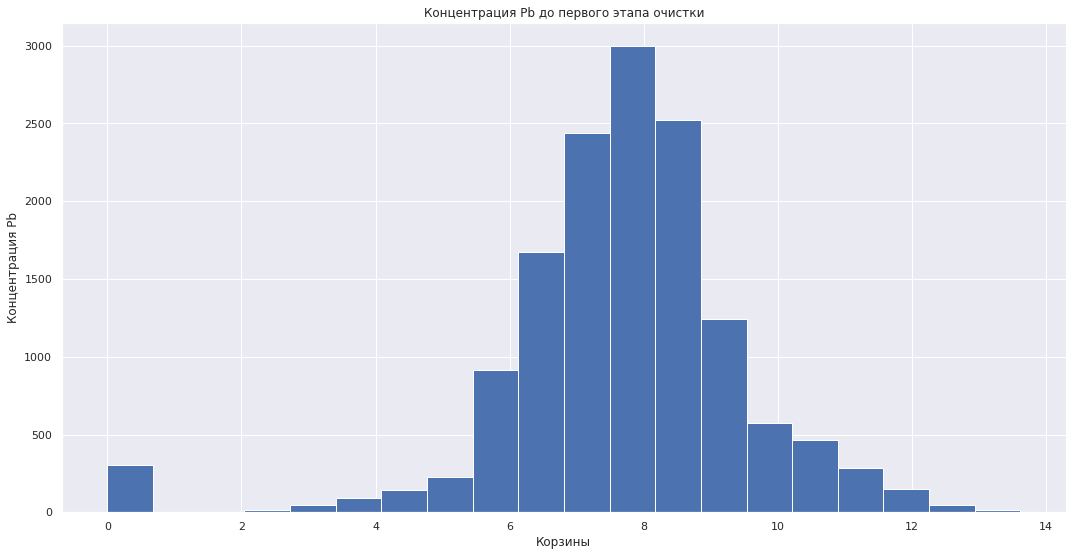

In [27]:
gold_recovery_train_new['rougher.output.concentrate_pb'].hist(bins=20)
plt.title('Концентрация Pb до первого этапа очистки');
plt.xlabel('Корзины')
plt.ylabel('Концентрация Pb');

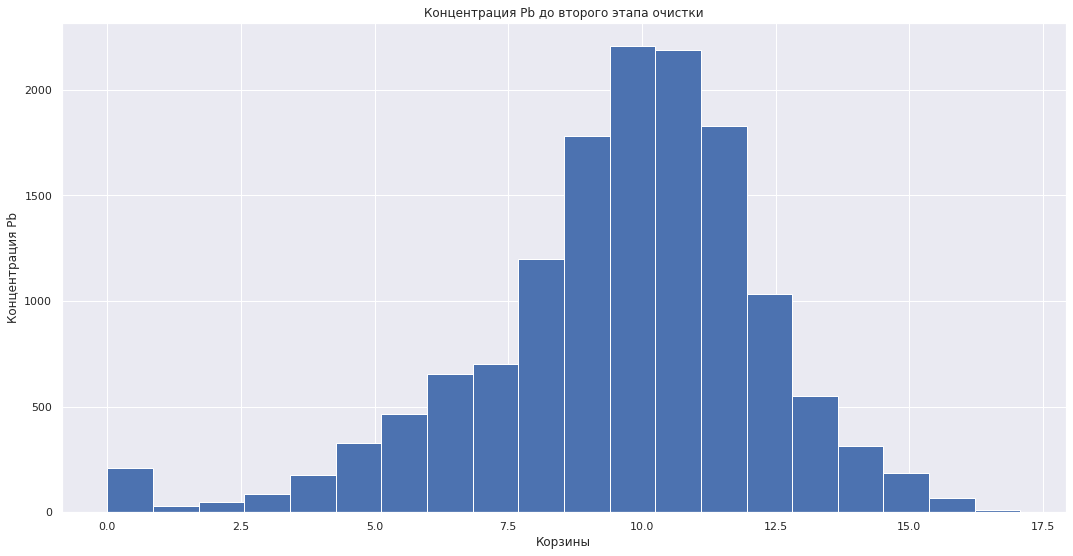

In [28]:
gold_recovery_train_new['primary_cleaner.output.concentrate_pb'].hist(bins=20)
plt.title('Концентрация Pb до второго этапа очистки');
plt.xlabel('Корзины')
plt.ylabel('Концентрация Pb');

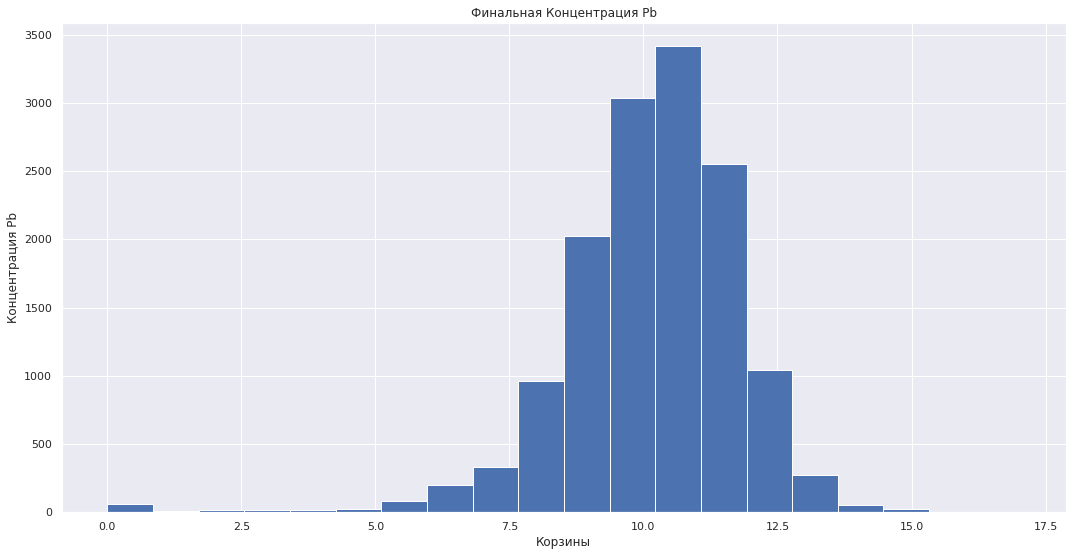

In [29]:
gold_recovery_train_new['final.output.concentrate_pb'].hist(bins=20)
plt.title('Финальная Концентрация Pb');
plt.xlabel('Корзины')
plt.ylabel('Концентрация Pb');

**Из графиков видно, что наибольшая общая концентрация метала Pb на финальной стадии, и концентрация увеличивается с каждым этапом очистки**

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

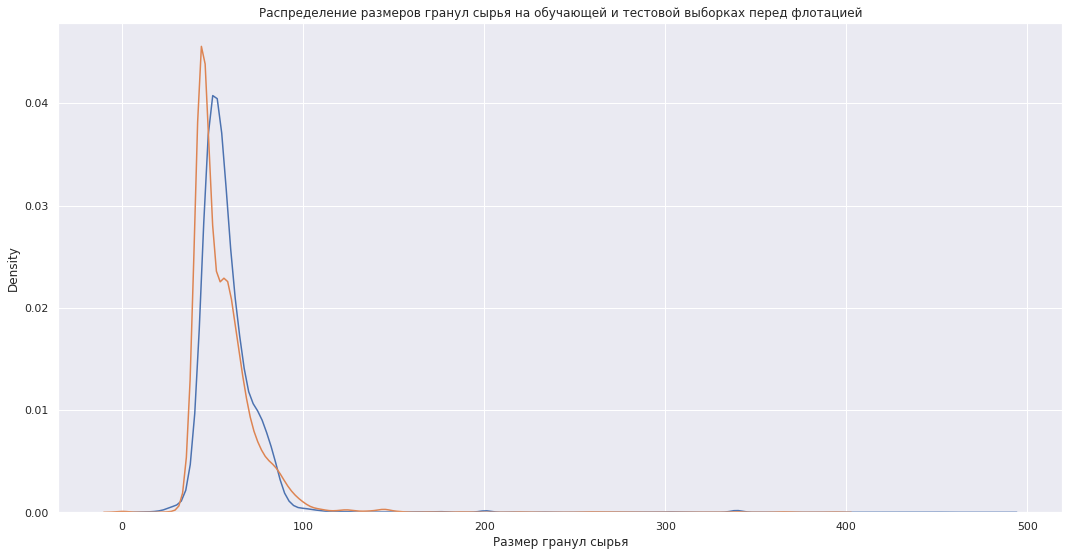

In [30]:
sns.kdeplot(data=gold_recovery_train_new_remove['rougher.input.feed_size'])
sns.kdeplot(data=gold_recovery_test_new_remove['rougher.input.feed_size']).set_xlabel('Размер гранул сырья')
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках перед флотацией');

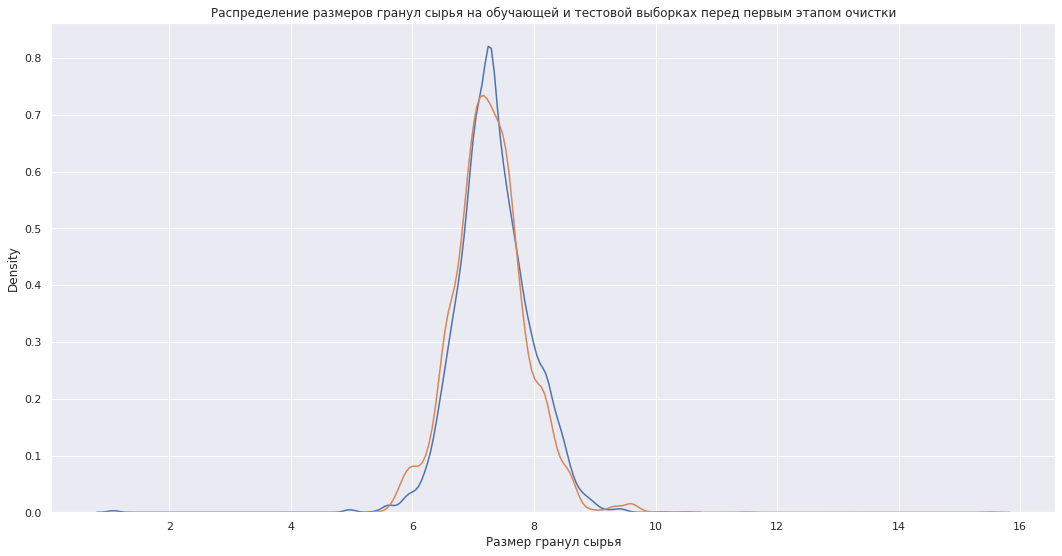

In [31]:
sns.kdeplot(data=gold_recovery_train_new_remove['primary_cleaner.input.feed_size'])
sns.kdeplot(data=gold_recovery_test_new_remove['primary_cleaner.input.feed_size']).set_xlabel('Размер гранул сырья')
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках перед первым этапом очистки');

Из графиков видно, что распределения повторяют друг друга. Можно сказать, что распределения не отличаются 

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [32]:
concentration_feedstock = pd.DataFrame(gold_recovery_train_new['rougher.input.feed_ag'] + \
gold_recovery_train_new['rougher.input.feed_au'] + \
gold_recovery_train_new['rougher.input.feed_pb'], columns=['feedstock'])

concentration_rough = pd.DataFrame(gold_recovery_train_new['rougher.output.concentrate_ag'] + \
gold_recovery_train_new['rougher.output.concentrate_au'] + \
gold_recovery_train_new['rougher.output.concentrate_pb'], columns=['rough'])

concentration_final = pd.DataFrame(gold_recovery_train_new['final.output.concentrate_ag'] + \
gold_recovery_train_new['final.output.concentrate_au'] + \
gold_recovery_train_new['final.output.concentrate_pb'], columns=['final'])

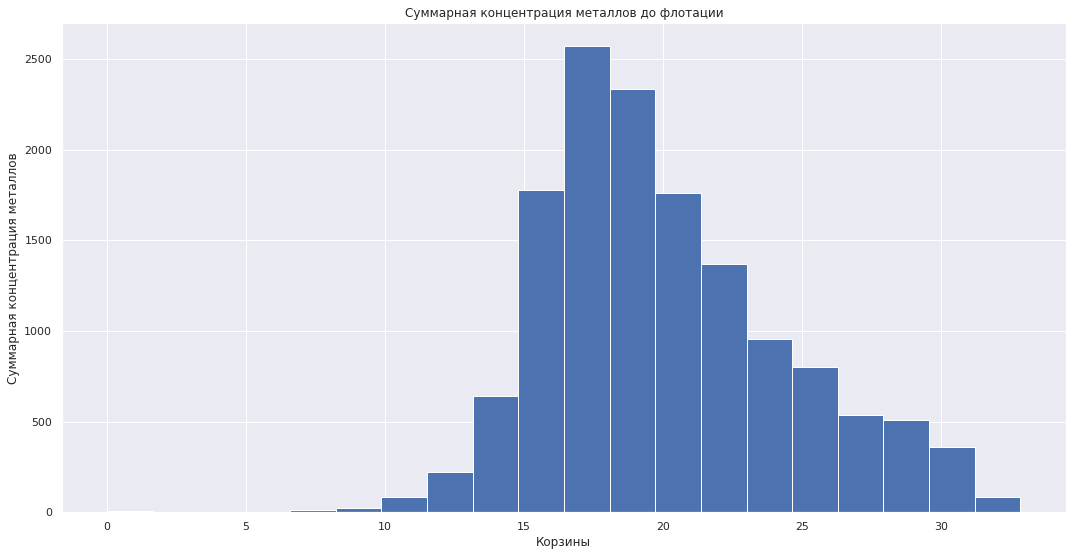

In [33]:
concentration_feedstock.hist(bins=20);
plt.title('Суммарная концентрация металлов до флотации')
plt.xlabel('Корзины')
plt.ylabel('Суммарная концентрация металлов');

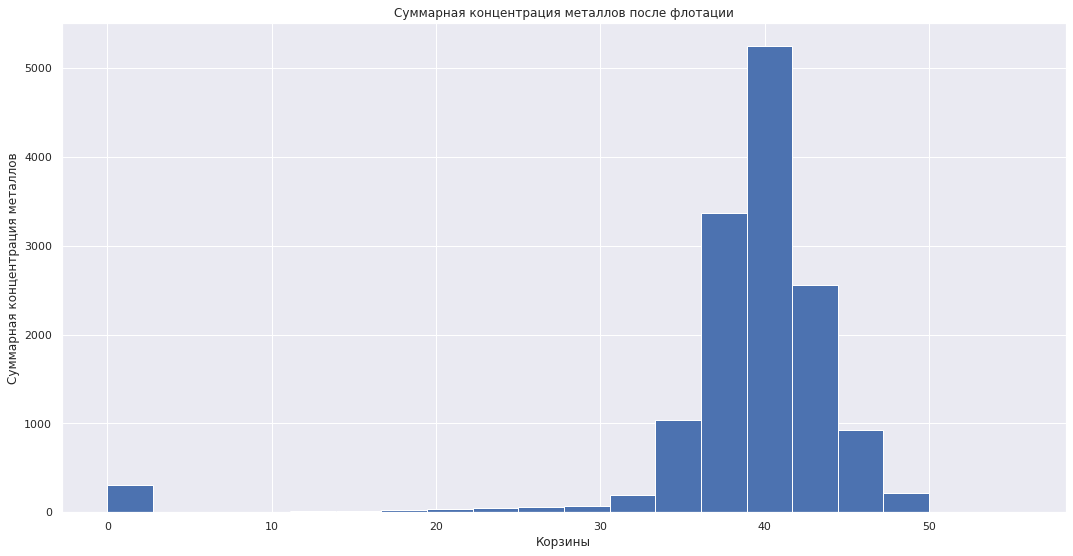

In [34]:
concentration_rough.hist(bins=20);
plt.title('Суммарная концентрация металлов после флотации')
plt.xlabel('Корзины')
plt.ylabel('Суммарная концентрация металлов');

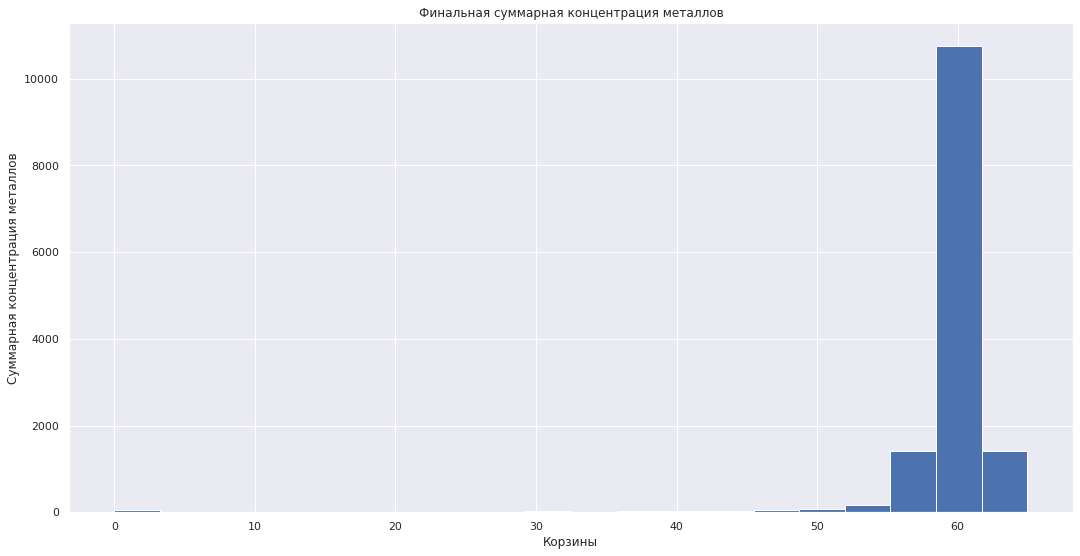

In [35]:
concentration_final.hist(bins=20);
plt.title('Финальная суммарная концентрация металлов')
plt.xlabel('Корзины')
plt.ylabel('Суммарная концентрация металлов');

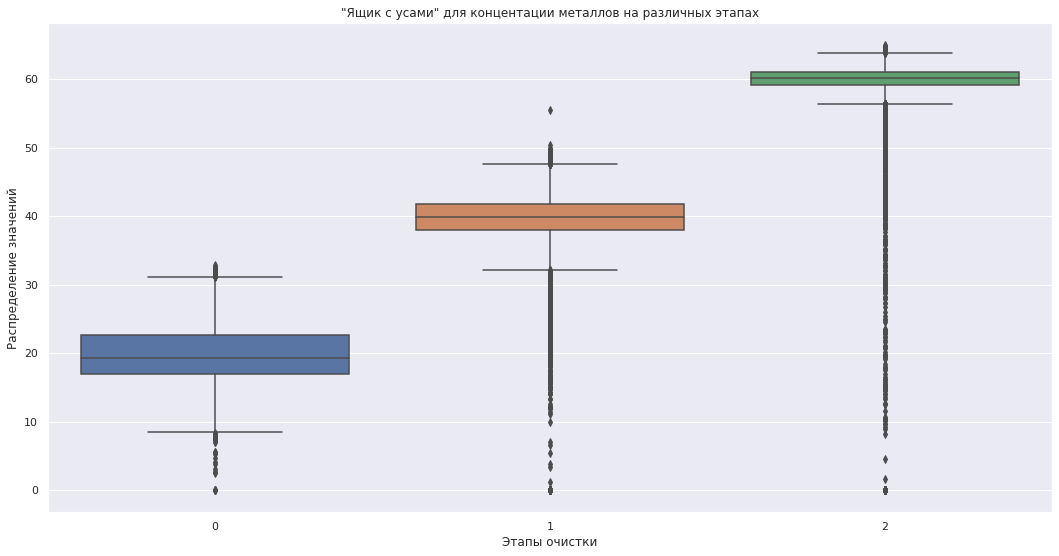

In [36]:
sns.boxplot(data=[concentration_feedstock,concentration_rough,concentration_final])
plt.title('"Ящик с усами" для концентации металлов на различных этапах')
plt.xlabel('Этапы очистки')
plt.ylabel('Распределение значений');

**Из графиков видно, что концентрация увеличивается с каждым этапом обработки и ее максимальное значение находится в финальном виде. Также можно заметить большое количество выбросов для значений финальной концентрации. Найдем все значения, которые в сумме равны нулю и уберем их.**

In [37]:
concentration_feedstock.loc[concentration_feedstock['feedstock'] == 0].count(), \
concentration_rough.loc[concentration_rough['rough'] == 0].count(), \
concentration_final.loc[concentration_final['final'] == 0].count()

(feedstock    0
 dtype: int64,
 rough    297
 dtype: int64,
 final    58
 dtype: int64)

Суммарные нулевые значения действительно есть, удалим их

In [38]:
row_sum_zero = []
for i in range(0, len(gold_recovery_train_new)):
    if (gold_recovery_train_new.loc[i,'rougher.output.concentrate_ag'] == 0 \
    and gold_recovery_train_new.loc[i,'rougher.output.concentrate_au'] == 0 \
    and gold_recovery_train_new.loc[i,'rougher.output.concentrate_pb'] == 0) \
    or (gold_recovery_train_new.loc[i,'final.output.concentrate_ag'] == 0 \
    and gold_recovery_train_new.loc[i,'final.output.concentrate_au'] == 0 \
    and gold_recovery_train_new.loc[i,'final.output.concentrate_pb'] == 0):
        row_sum_zero.append(i)
gold_recovery_train_new = gold_recovery_train_new.drop(labels=row_sum_zero, axis=0)

**В данном разделе был произведен анализ: концентрации металлов на различных этапах очистки, распределения гранул сырья на обучающей и тестовой выборах, суммарной концентрации всех веществ на разных стадиях очистки. Нашли суммарные нулевые значения и удалили их из обучающей выборки.**

## Модель

Напишем функцию для вычисления итоговой sMAPE

In [39]:
def sMAPE_func(x_true, x_pred):
    x_true = x_true.reset_index()
    x_pred = pd.DataFrame(x_pred, columns=['rougher.output.recovery_pred','final.output.recovery_pred'])
    smape_rougher = (
        ((abs(x_true['rougher.output.recovery'] - x_pred['rougher.output.recovery_pred'])) / \
        ((abs(x_true['rougher.output.recovery']) + abs(x_pred['rougher.output.recovery_pred'])) / 2)).sum() / \
        len(x_true['rougher.output.recovery']) \
        ) * 100
    smape_final = (
        ((abs(x_true['final.output.recovery'] - x_pred['final.output.recovery_pred'])) / \
        ((abs(x_true['final.output.recovery']) + abs(x_pred['final.output.recovery_pred'])) / 2)).sum() / \
        len(x_true['final.output.recovery']) \
        ) * 100
    total_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return total_smape

Разобьем наши выборки на обучающую и целевую выборку.

In [40]:
features_train = gold_recovery_train_new_remove.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_train = gold_recovery_train_new_remove[['rougher.output.recovery', 'final.output.recovery']]
features_test = gold_recovery_test_new_remove.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_test = gold_recovery_test_new_remove[['rougher.output.recovery', 'final.output.recovery']]

Обучим модель регрессии и посчитаем качество модели

In [41]:
model = LinearRegression()
smape = make_scorer(sMAPE_func, greater_is_better=False)
cv_linear_regression = cross_val_score(model, features_train, target_train, cv=3, scoring=smape)
print(f'sMAPE модели: {abs(cv_linear_regression.mean())}')

sMAPE модели: 12.064889586727903


Обучим модель дерева решений и посчитаем качество модели

In [42]:
cv_mean = 1000
for depth in range(2, 11):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    cv_tree = cross_val_score(model, features_train, target_train, cv=3, scoring=smape)
    cv_mean_tree = cv_tree.mean()
    if cv_mean_tree < cv_mean:
        model_tree = model
        cv_mean = cv_mean_tree
        cv = cv_tree
        depth_tree = depth
print(f'sMAPE модели: {abs(cv_mean)}, глубина дерева: {depth_tree}')

sMAPE модели: 13.876554141979403, глубина дерева: 10


Обучим случайного леса и посчитаем качество модели

In [43]:
cv_mean = 1000
for depth in range(2, 11):
    for est in range(5, 101, 5):
        model = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=est)
        cv_forest = cross_val_score(model, features_train, target_train, cv=3, scoring=smape)
        cv_mean_forest = cv_forest.mean()
        if cv_mean_forest < cv_mean:
            model_forest = model
            cv_mean = cv_mean_forest
            cv = cv_forest
            depth_forest = depth
            est_forest = est
print(f'sMAPE модели: {abs(cv_mean)},\n\
глубина деревьев случайного леса: {depth_forest}, число деревьев: {est_forest}')

sMAPE модели: 13.389718719622842,
глубина деревьев случайного леса: 20, число деревьев: 5


Лучший параметр sMAPE показала модель линейной регрессии, примем эту модель для финального тестирования

In [44]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

In [45]:
test_predict = model.predict(features_test)
test_smape = sMAPE_func(target_test, test_predict)
print(f'Параметр sMAPE после финального тестирования: {test_smape}')

Параметр sMAPE после финального тестирования: 9.210107929028654


Параметр sMAPE после финального тестирования составляет 9.210107929028654. Значение получилось даже меньше чем на этапе обучения. Для данной метрики это хорошее развитие событий, так как мы стремимся приблизиться к 0. 

Проверим нашу модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу 

In [46]:
dummy_regr = DummyRegressor()
dummy_regr.fit(features_train, target_train)
dummy_regr_predict = dummy_regr.predict(features_test)
dummy_regr_smape = sMAPE_func(target_test, dummy_regr_predict)
print(f'Параметр sMAPE dummy-модели: {dummy_regr_smape}')

Параметр sMAPE dummy-модели: 9.744788079141177


Итоговая проверка показала, что выбранная модель показывает лучше результат, чем модель которая предсказывает константу 

## Вывод

В разделе “Подготовка данных” были подгружены 3 датафрейма: изначальные данные, обучающая выборка и тестовая выборка. Вывели общую информацию о них, посчитали правильность расчета эффективности обогащения. Расчет показал, что отличие параметров эффективности обогащения датафрейма с расчетными – минимальны, и составляет 9.73512347450521e-15. Определили, что в тестовой выборке отсутствуют выходные величины так как скорее всего они соответствуют входным величинам на следующем этапе. Добавили таргетные признаки в тестовую выборку.  Удалены все пропуски, чтобы на модель не влияли искусственные данные в случае, если бы мы заполняли пропуски самостоятельно. Произведена проверка на дубликаты.  

В разделе “Анализ данных” изучили как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 
- Для концентрации Au: наибольшая общая концентрация метала Au на финальной стадии, и концентрация увеличивается с каждым этапом очистки.
- Для концентрации Ag: наибольшая общая концентрация метала Ag на стадии перед первым этапом очистки и концентрация уменьшается с каждым этапом очистки после флотации.
- Для концентрации Pb: наибольшая общая концентрация метала Pb на финальной стадии, и концентрация увеличивается с каждым этапом очистки

Проверили распределения размеров гранул сырья на обучающей и тестовой выборках. График распределения плотности показал, что распределения повторяют друг друга. Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Концентрация увеличивается с каждым этапом обработки и ее максимальное значение находится в финальном виде.

В разделе “Модель” была написана функция для расчета метрики sMAPE, выборки разбиты по признакам для обучения. Обучены 3 различных модели: модель линейной регрессии, модель дерева решений для регрессии и модель случайного леса для регрессии. Лучший результат после проверки методом кроссвалидации показала модель линейной регрессии, так как у нее наименьший sMAPE с показателем 12.064889586727903. Ее мы и взяли для финального тестирования. В финальном тестировании модель показала параметр sMAPE - 9.210107929028654, что даже лучше, чем на этапе обучения. Итоговая проверка показала что наилучшая модель имеет показатель sMAPE нижу чем у модели, предсказывающую константу, это и доказывает обоснованность использования модели линейной регрессии. 

